In [54]:
def m(x, w):
    """Weighted Mean"""
    return np.sum(x * w) / np.sum(w)

def cov(x, y, w):
    """Weighted Covariance"""
    return np.sum(w * (x - m(x, w)) * (y - m(y, w))) / np.sum(w)

def corr(x, y, w):
    """Weighted Correlation"""
    return cov(x, y, w) / np.sqrt(cov(x, x, w) * cov(y, y, w))

features_map = {
    "mva": ['BDT Discriminator', 30, 0, 1],
    "e_m_Mass": ['$m_{e\mu}$ [GeV]', 50, 110, 160],
    "met": ['$E^{miss}_{T}$ [GeV]', 30, 0, 200],
    "eEta": ['$\eta^{e}$', 30, -2.5, 2.5],
    "mEta": ['$\eta^{\mu}$', 30, -2.5, 2.5],
    "mpt": ['$p_{T}^{\mu}$', 30, 26, 200], 
    "ept": ['$p_{T}^{e}$', 30, 24, 200], 
    "mpt_Per_e_m_Mass": ['$p_{T}^{\mu}/m_{e\mu}$', 30, 0.15, 1], 
    "ept_Per_e_m_Mass": ['$p_{T}^{e}/m_{e\mu}$', 30, 0.15, 1], 
    "empt": ['$p_{T}^{e\mu}$ [GeV]', 30, 0, 200],
    "emEta": ['$\eta^{e\mu}$', 30, -6, 6], 
    "DeltaEta_e_m": ['$\Delta \eta[e, \mu]$', 30, 0, 3.5], 
    "DeltaPhi_e_m": ['$\Delta \phi[e, \mu]$', 30, 0, 3.2], 
    "DeltaPhi_em_met": ['$\Delta \phi[e\mu, MET]$', 30, 0, 3.2], 
    "DeltaR_e_m": ['$\Delta R[e, \mu]$', 30, 0, 4.5], 
    "e_met_mT": ['$m_{T}[e, MET]$', 30, 0, 250], 
    "m_met_mT": ['$m_{T}[\mu, MET]$', 30, 0, 250], 
    "e_m_met_mT": ['$m_{T}[\mu, MET]$', 30, 0, 250], 
    "pZeta85": ['$p_{\zeta}$ [GeV]', 50, -150, 150], 
    "pZeta15": ['$p_{\zeta}$ [GeV]', 30, -200, 100], 
    "pZeta": ['$p_{\zeta}$ [GeV]', 30, -200, 100], 
    "pZetaVis": ['$p^{vis}_{\zeta}$ [GeV]', 550, -200, 350],
    "j1pt": ['$p_{T}^{j_{1}}$ [GeV]', 30, 30, 250], 
    "j1Eta": ['$\eta^{j_{1}}$', 30, -5, 5], 
    "DeltaEta_j1_em": ['$\Delta \eta[j_{1}, e\mu]$', 40, 0, 6], 
    "DeltaPhi_j1_em": ['$\Delta \phi[j_{1}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_j1_em": ['$\Delta R[j_{1}, e\mu]$', 80, 0, 8],
    "j2pt": ['$p_{T}^{j_{2}}$ [GeV]', 30, 30, 100], 
    "j2Eta": ['$\eta^{j_{2}}$', 30, -5, 5], 
    "j1_j2_mass": ['$m_{j_{1}j_{2}}$ [GeV]', 30, 0, 450], 
    "DeltaEta_em_j1j2": ['$\Delta \eta[j_{1}j_{2}, e\mu]$', 40, 0, 6], 
    "DeltaPhi_em_j1j2": ['$\Delta \phi[j_{1}j_{2}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_em_j1j2": ['$\Delta R[j_{1}j_{2}, e\mu]$', 70, 0, 7], 
    "DeltaEta_j2_em": ['$\Delta \eta[j_{2}, e\mu]$', 50, 0, 5], 
    "DeltaPhi_j2_em": ['$\Delta \phi[j_{2}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_j2_em": ['$\Delta R[j_{2}, e\mu]$', 70, 0, 7], 
    "DeltaEta_j1_j2": ['$\Delta \eta[j_{1}, j_{2}]$', 30, 0, 4.5], 
    "DeltaPhi_j1_j2": ['$\Delta \phi[j_{1}, j_{2}]$', 30, 0, 3.2], 
    "DeltaR_j1_j2": ['$\Delta R[j_{1}, j_{2}]$', 30, 0, 7], 
    "Zeppenfeld": ['$\eta^{e\mu}-(\eta^{j_{1}}+\eta^{j_{2}})/2$', 30, -5, 5], 
    "Zeppenfeld_DeltaEta": [r'Zeppenfeld variable', 30, -6, 6], 
    "absZeppenfeld_DeltaEta": ['', 100, -5, 5], 
    "cen": ['', 50, 0, 1.2], 
    "Rpt": ['$R_{p_{T}}$', 30, 0, 0.8], 
    "pt_cen": ['', 100, 0, 1], 
    "pt_cen_Deltapt": [r'$p_{T}$-centrality', 30, 0, 1.5], 
    "abspt_cen_Deltapt": ['', 100, 0, 1], 
    "Ht_had": ['$H_{T}$ [GeV]', 40, 60, 600], 
    "Ht": ['$H_{T}$ [GeV]', 50, 0, 600],  
    "njets": ['Number of jets', 6, 0, 6],
}
feature_names = ['mpt', 'njets', 'met', 'DeltaEta_e_m', 'empt', 'DeltaPhi_em_met', 'j1pt', 'j2pt', 'DeltaEta_j1_em', 'j1Eta', 'DeltaEta_j1_j2', 'j1_j2_mass', 'Ht_had', 'Rpt', 'pt_cen_Deltapt']
feature_names_tex = ['$p_{T}^{\mu}$', 'nJets', '$E^{miss}_{T}$', '$\Delta \eta[e, \mu]$', '$p_{T}^{e\mu}$', '$\Delta \phi[e\mu, MET]$', '$p_{T}^{j_{1}}$', '$p_{T}^{j_{2}}$', '$\Delta \eta[j_{1}, e\mu]$', '$\eta^{j_{1}}$', '$\Delta \eta[j_{1}, j_{2}]$', '$m_{j_{1}j_{2}}$ [GeV]', '$H_{T}$', '$R_{p_{T}}$', '$p_{T}$-centrality']
feature_names_tex_dict = {feature_name:feature_name_tex for feature_name, feature_name_tex in zip(feature_names, feature_names_tex)}
print(len(feature_names),len(feature_names_tex))

15 15


In [66]:
from coffea.util import load
import numpy as np
import pandas as pd
import glob, os, json, argparse
years = ['2016preVFP']#, '2017', '2016postVFP','2018']
var_dict = {}
for year in years:
    print(f'Processing {year}')
    for subsample in ['signal']:
        #result = load(f"../results/{year}/makeDF/output_test1v9_{subsample}.coffea")
        result = load(f"../results/{year}/makeDF/output_test1v9.coffea")
        if isinstance(result,tuple):
            result = result[0]
        for varName in result:
            if varName in var_dict:
                var_dict[varName] = np.append(var_dict[varName],result[varName].value)
            else:
                var_dict[varName] = result[varName].value
df = pd.DataFrame(var_dict)

Processing 2016preVFP


In [67]:
data_clean = df[df.e_m_Mass.gt(110) & df.e_m_Mass.lt(160) & df.opp_charge.eq(1) & df.isVBFcat.eq(0)]
#data_clean['mpt'] = data_clean['mpt_Per_e_m_Mass']*data_clean['e_m_Mass']
#data_clean['ept'] = data_clean['mpt_Per_e_m_Mass']*data_clean['e_m_Mass']
data_bkg = data_clean[data_clean.label.eq(1)]
#get alternative sig
data_bkg120 = data_clean[data_clean.label.eq(120)]
data_bkg130 = data_clean[data_clean.label.eq(130)]

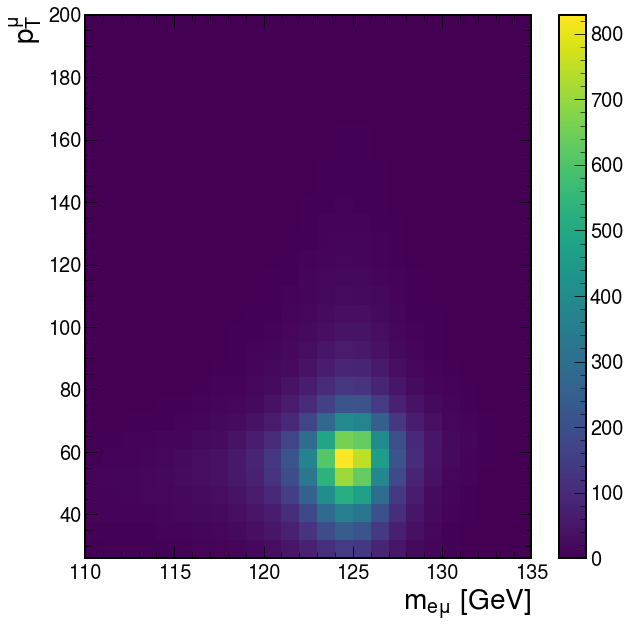

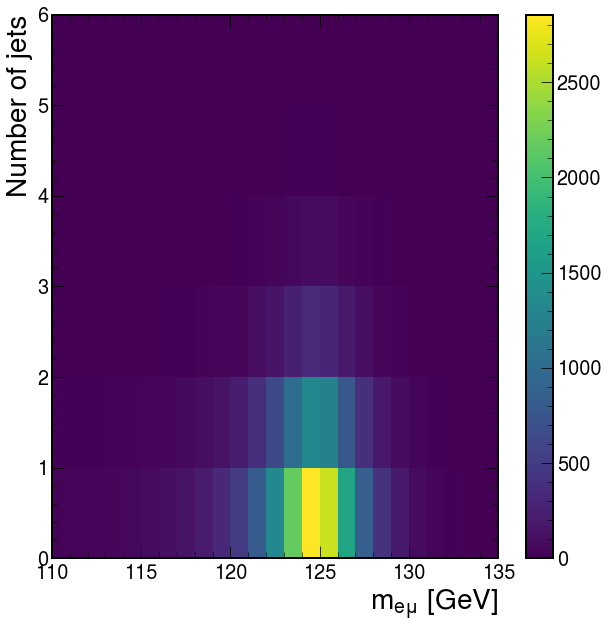

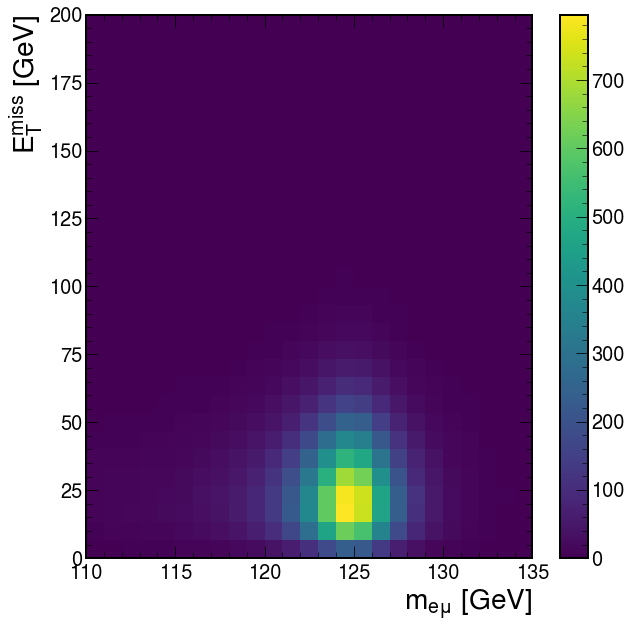

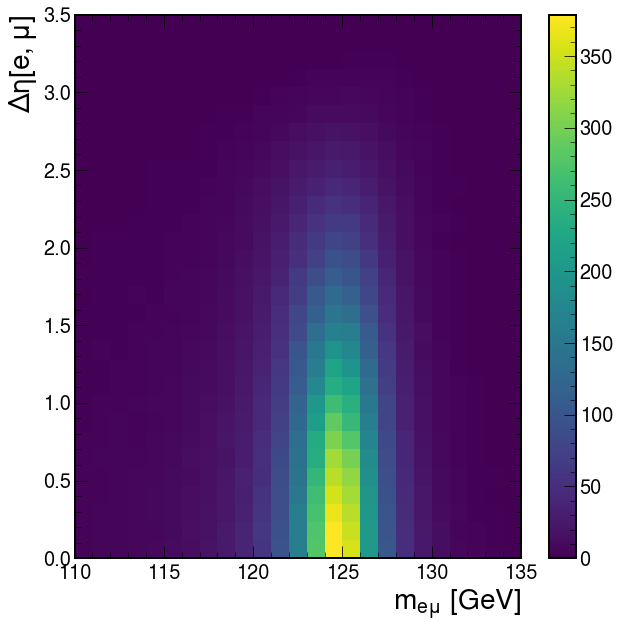

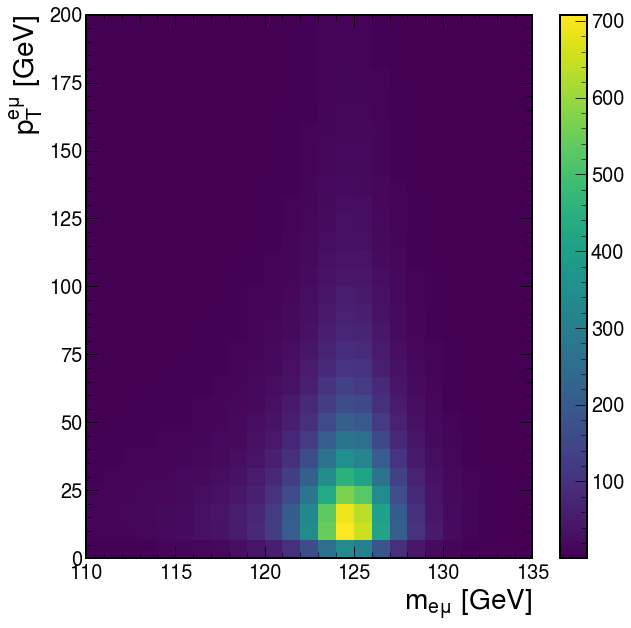

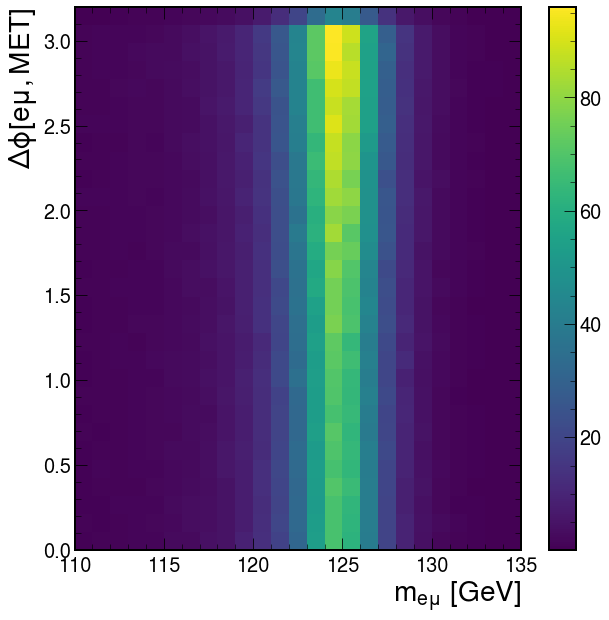

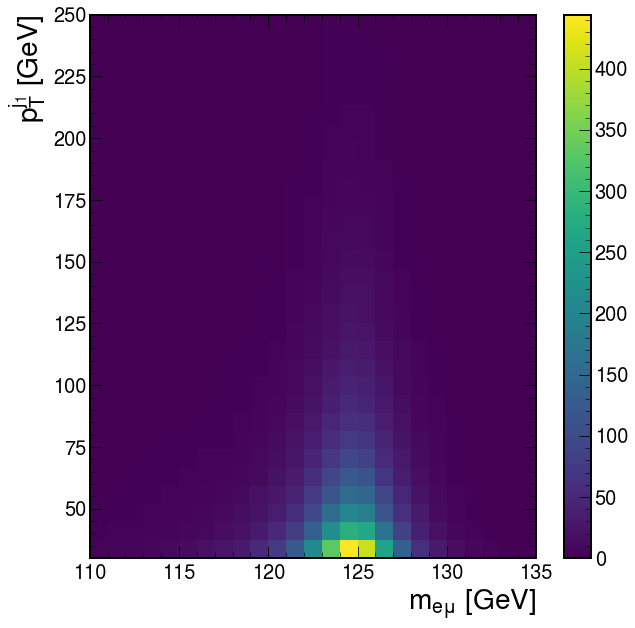

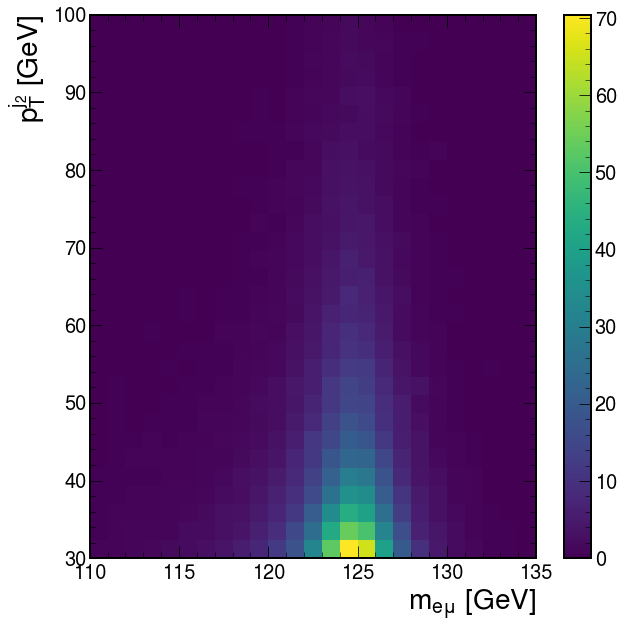

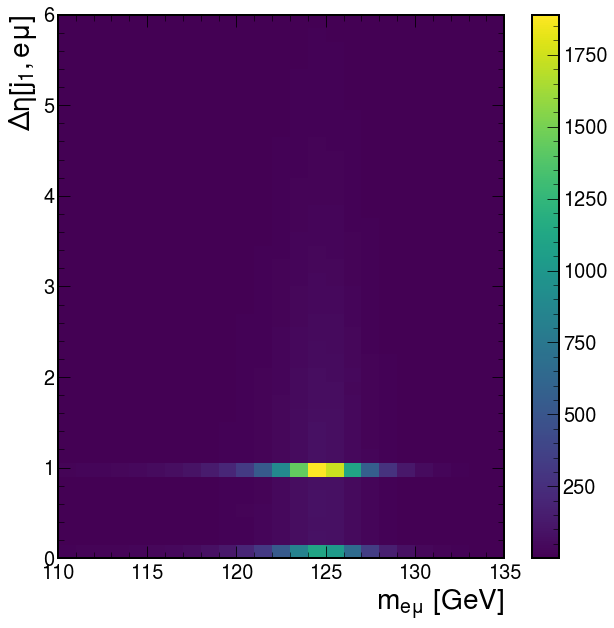

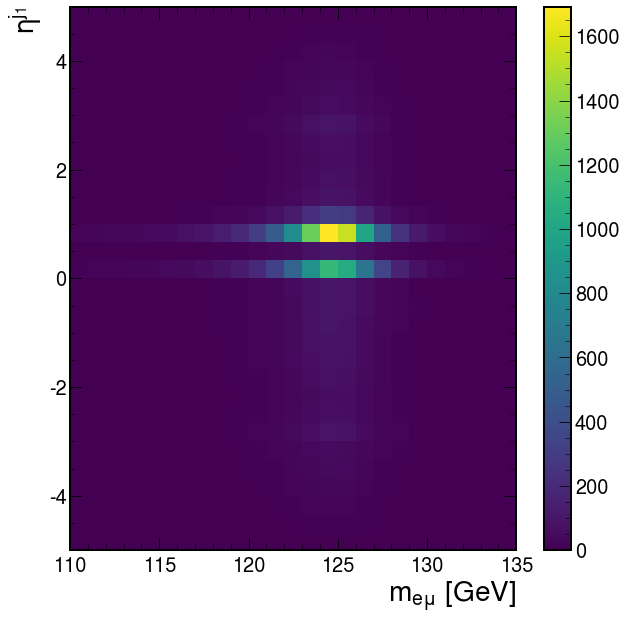

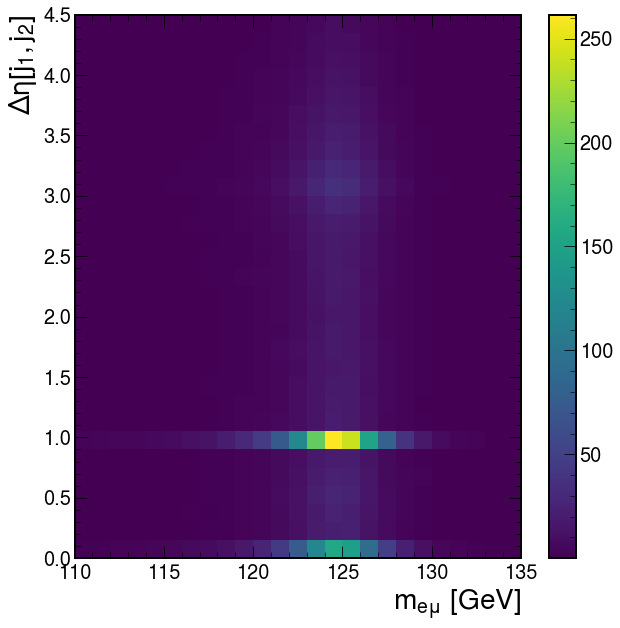

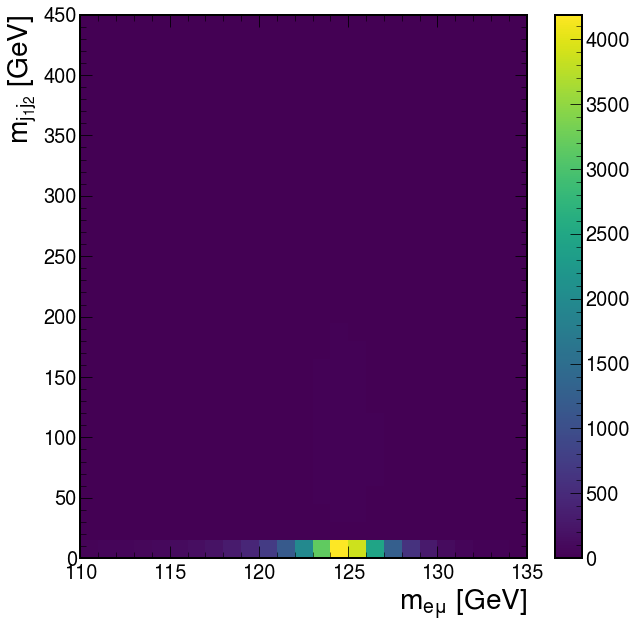

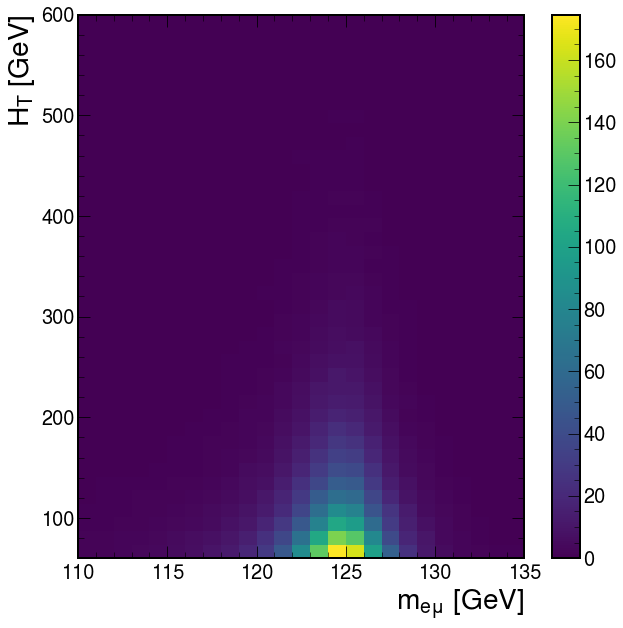

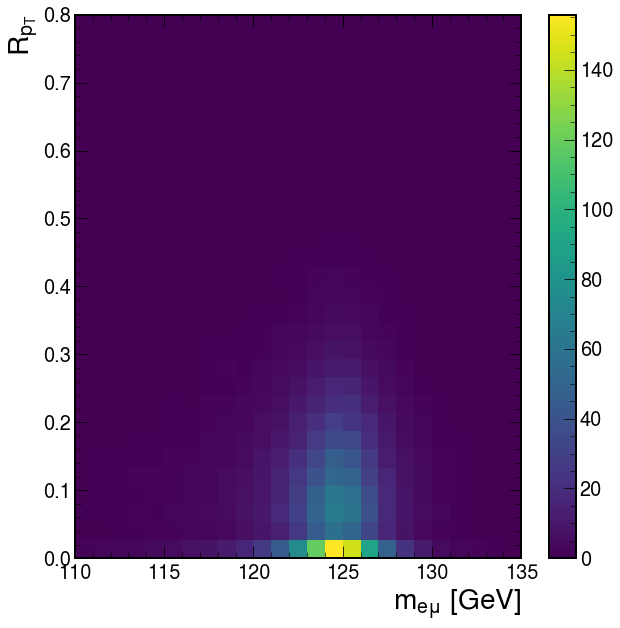

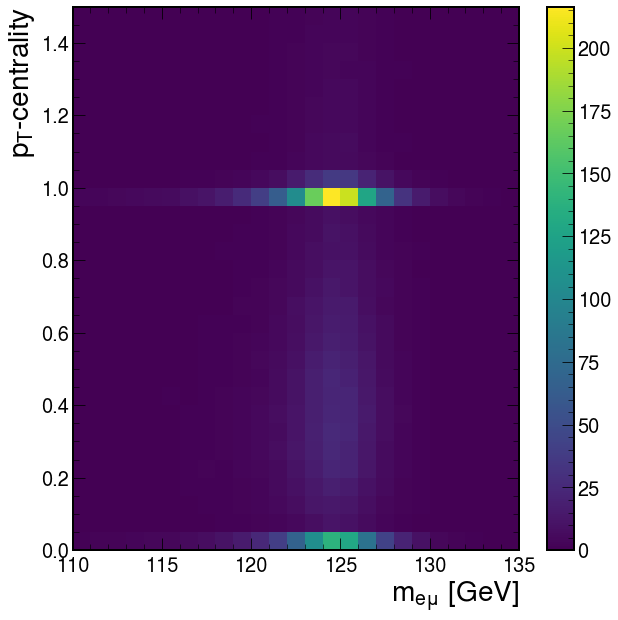

In [61]:
from coffea import hist
for feature_name in feature_names:
    h = hist.Hist("",
                    hist.Bin('e_m_Mass', '$m_{e\mu}$ [GeV]', 25, 110, 135),
                    hist.Bin(feature_name, *features_map[feature_name])
                    )
    args = {'e_m_Mass':data_bkg['e_m_Mass'].to_numpy(), feature_name:data_bkg[feature_name].to_numpy(), 'weight':data_bkg['weight'].to_numpy() }
    h.fill(**args)
    hist.plot2d(h, xaxis='e_m_Mass')

In [68]:
data_bkg[['DeltaEta_j1_em','njets']]

,DeltaEta_j1_em,njets
0,1.110659,1.0
1,NaN,0.0
2,0.683677,1.0
3,1.860245,1.0
4,0.145403,1.0
...,...,...
386910,NaN,0.0
386911,NaN,0.0
386912,1.165122,1.0
386913,NaN,0.0


In [69]:
data_bkg['DeltaEta_j1_em'].describe()

count    1.450540e+05
mean     1.936950e+00
std      1.512982e+00
min      9.536743e-07
25%      7.493372e-01
50%      1.595828e+00
75%      2.770604e+00
max      1.188004e+01
Name: DeltaEta_j1_em, dtype: float64

/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:44: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:313: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:316: RuntimeWarning: invalid value encountered in multiply
  _yerr_lo[i] = _yerr_lo[i] * density_arr[i]
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:317: RuntimeWarning: invalid value encountered in multiply
  _yerr_hi[i] = _yerr_hi[i] * density_

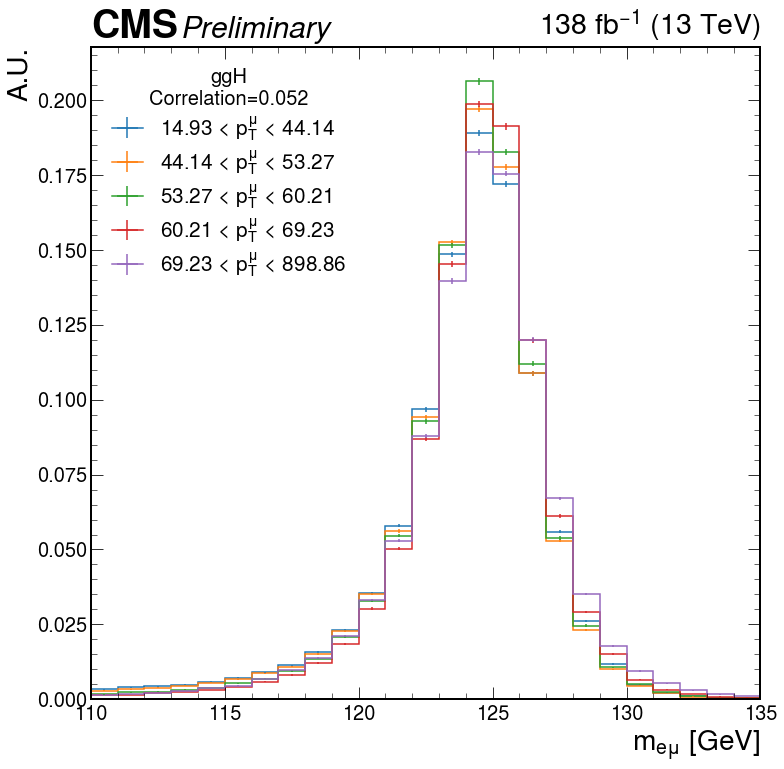

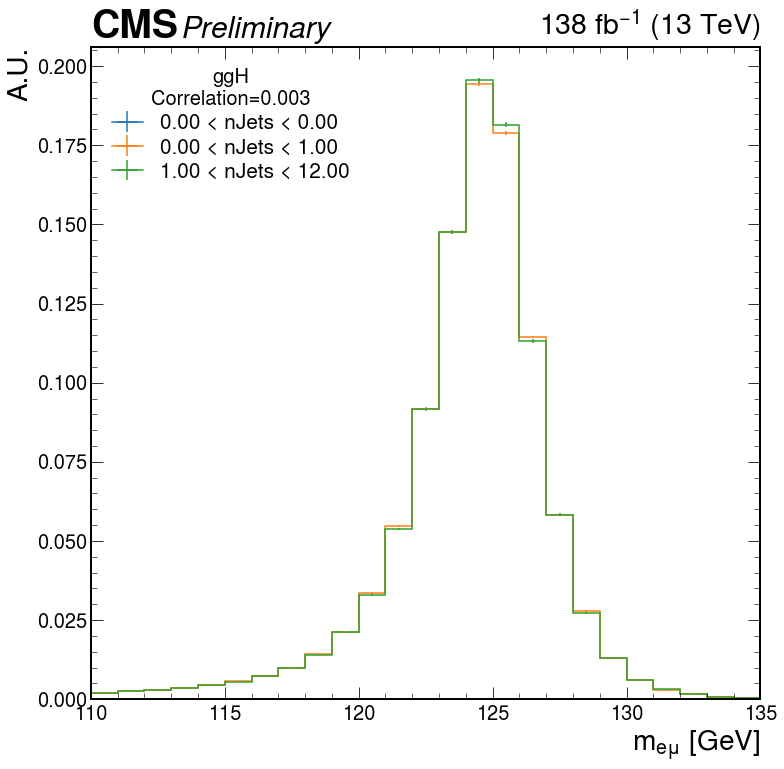

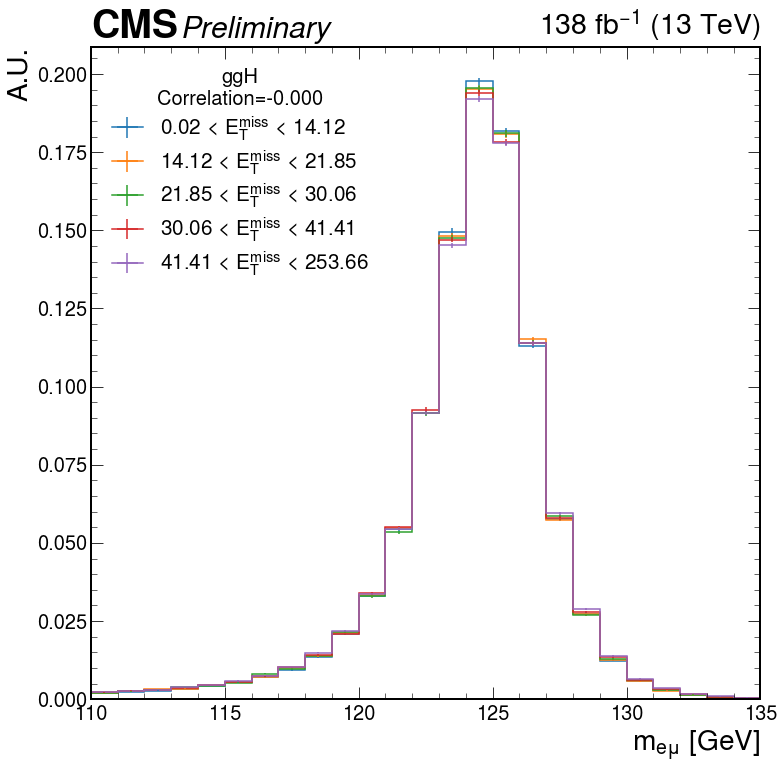

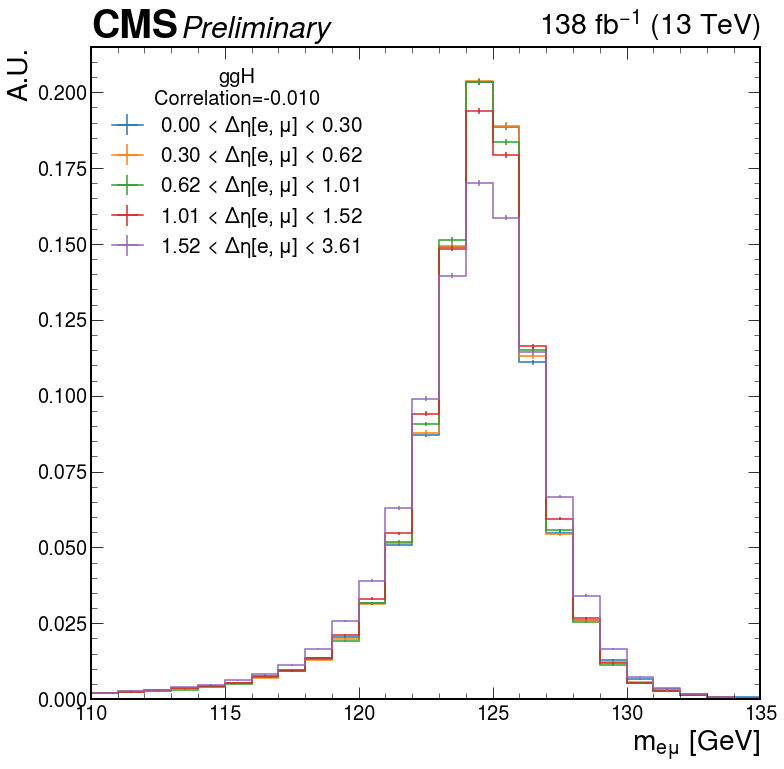

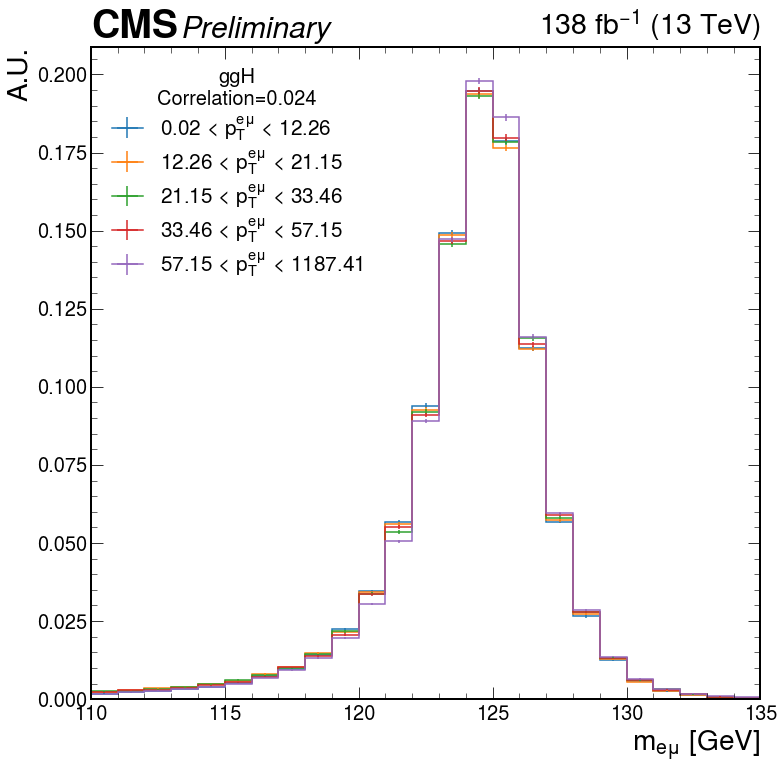

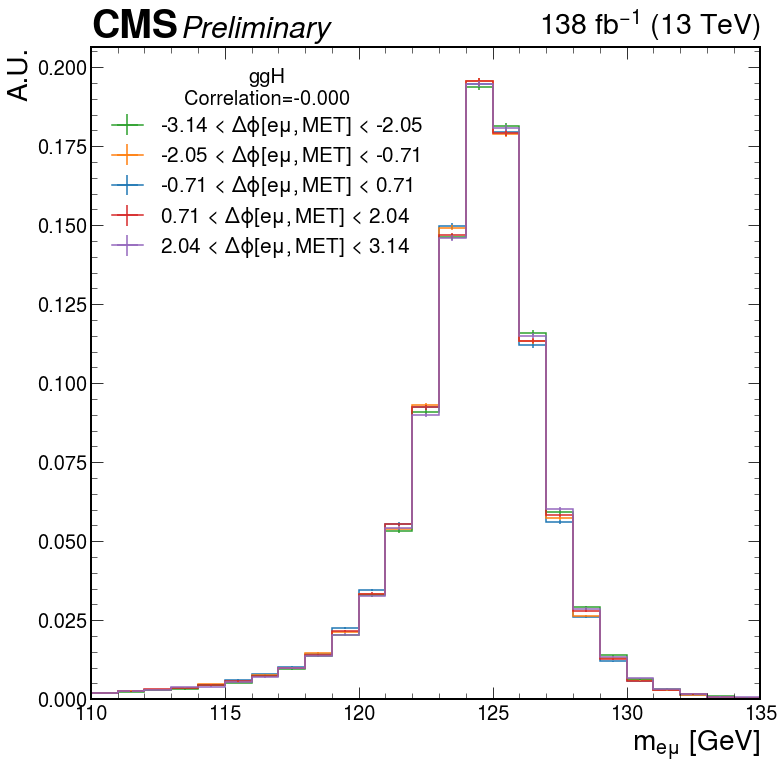

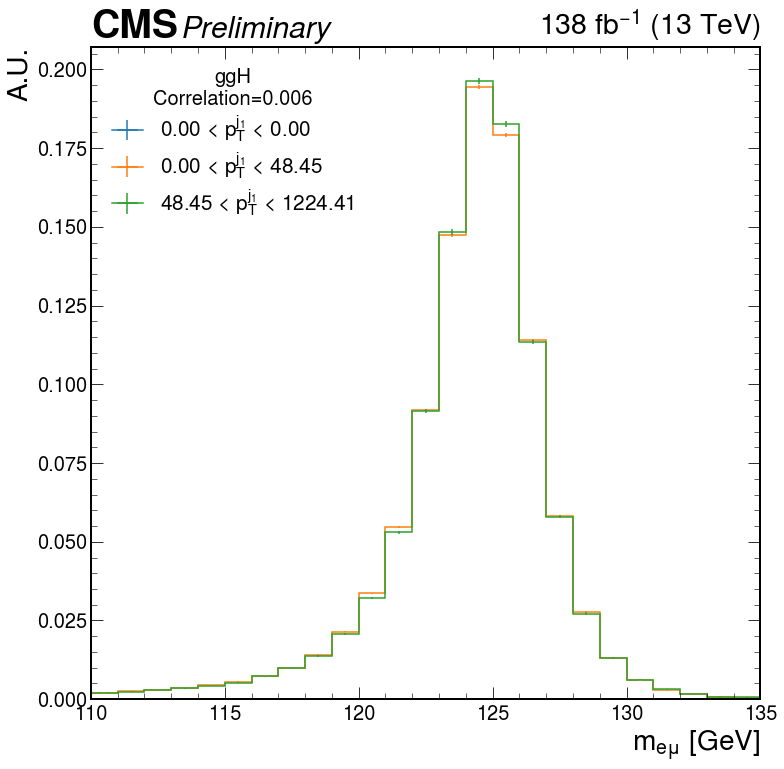

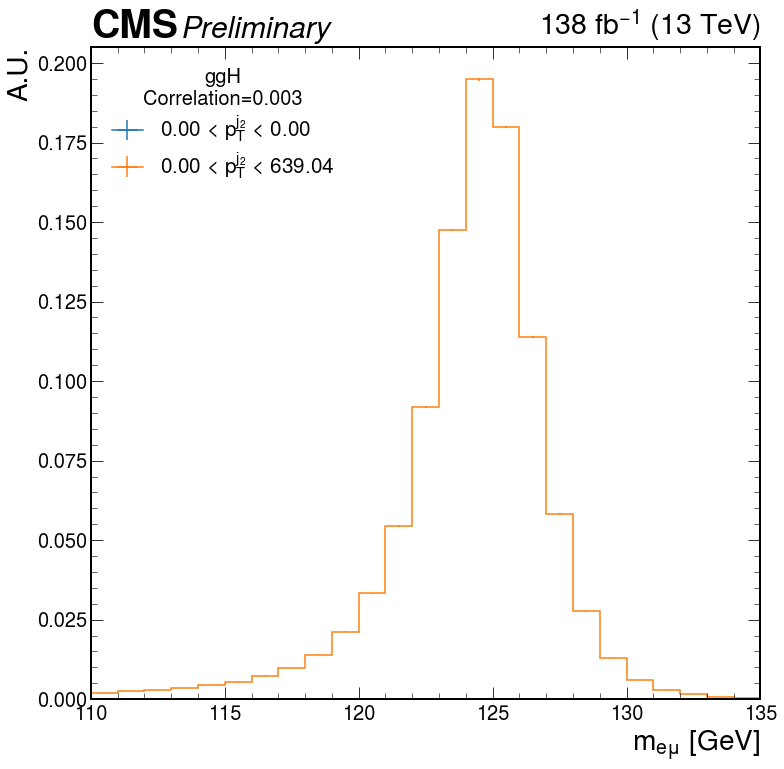

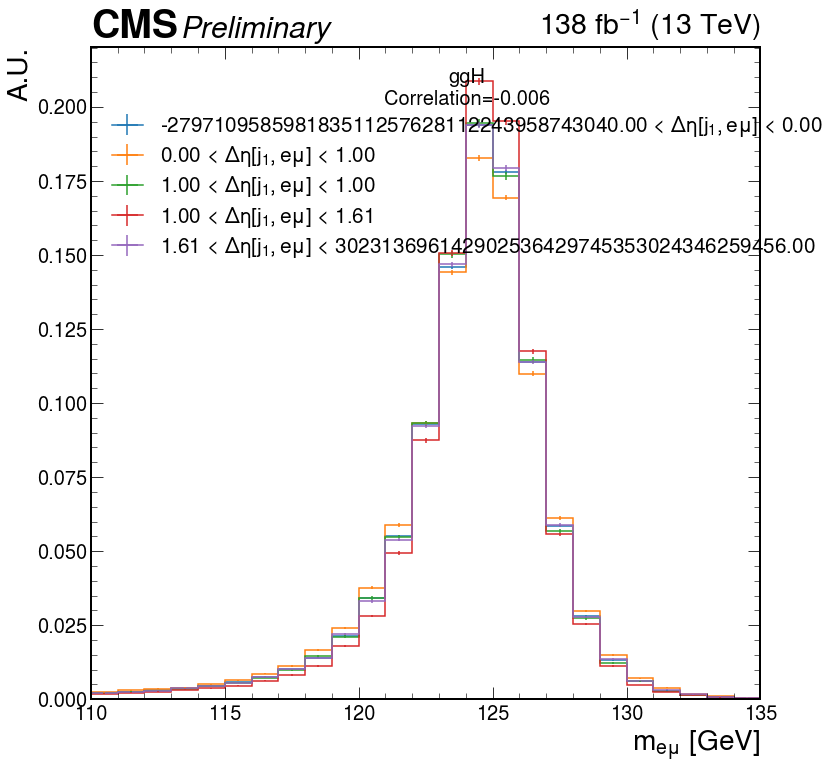

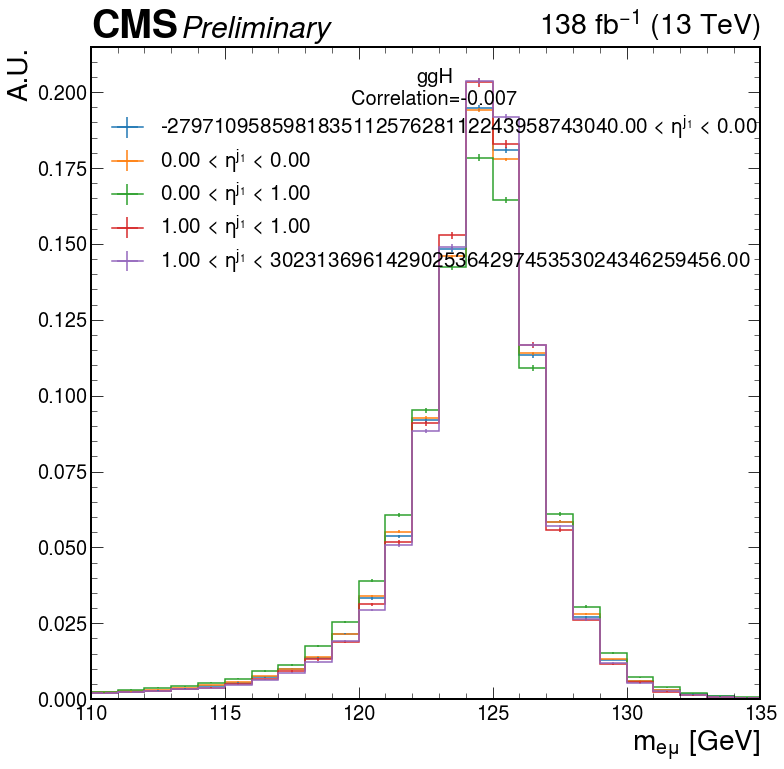

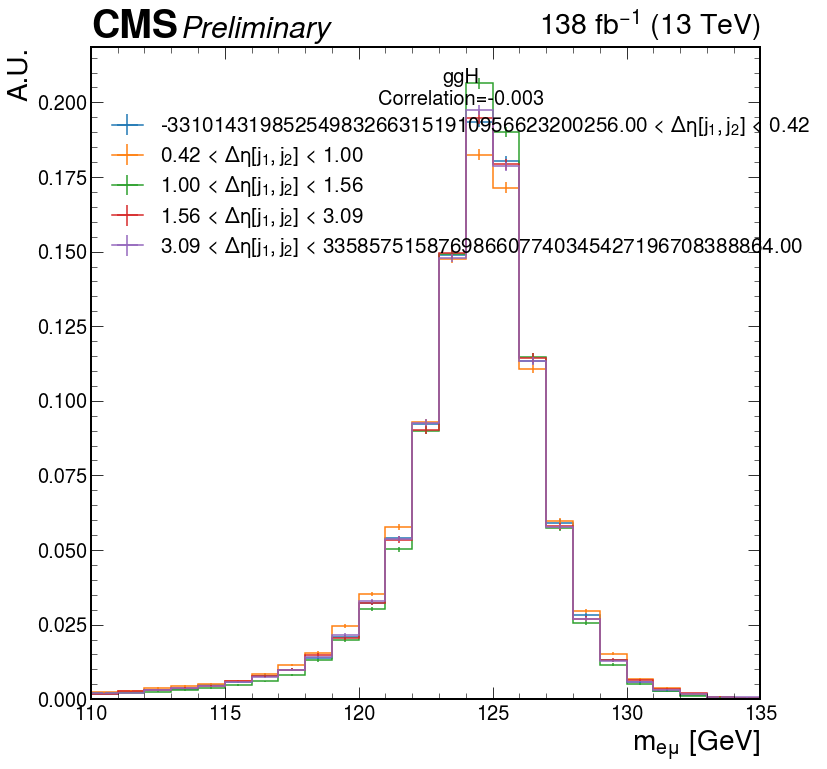

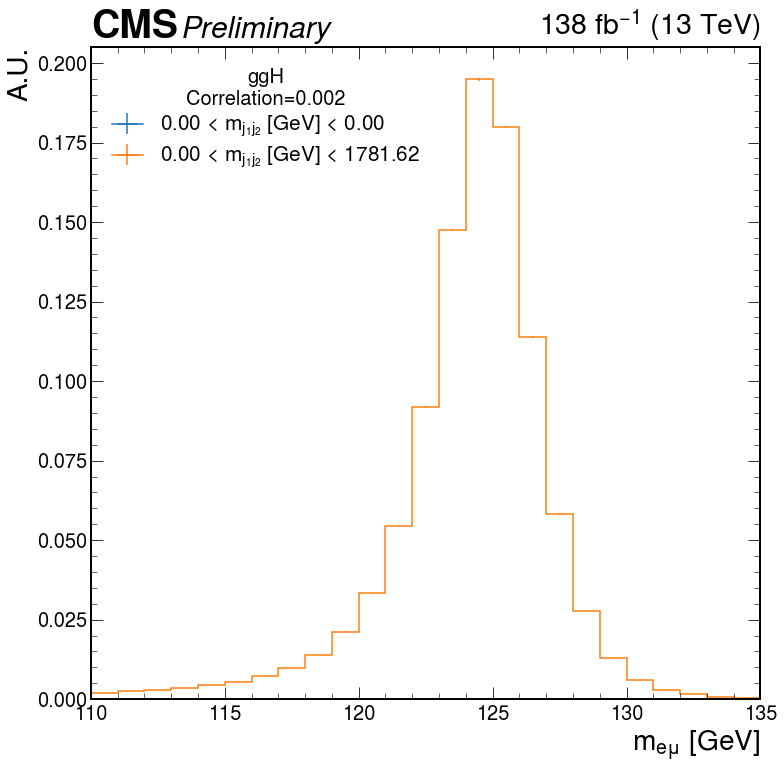

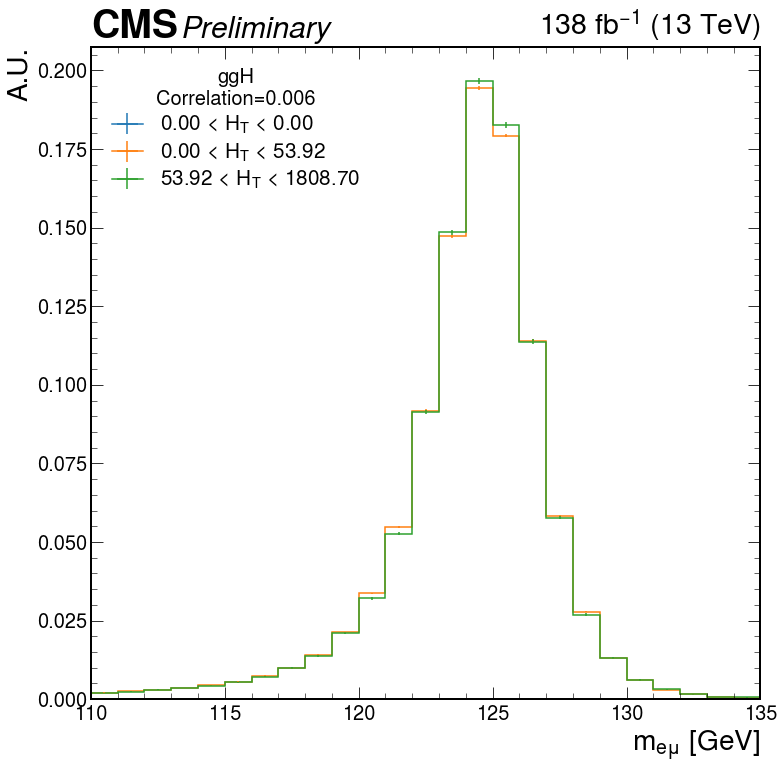

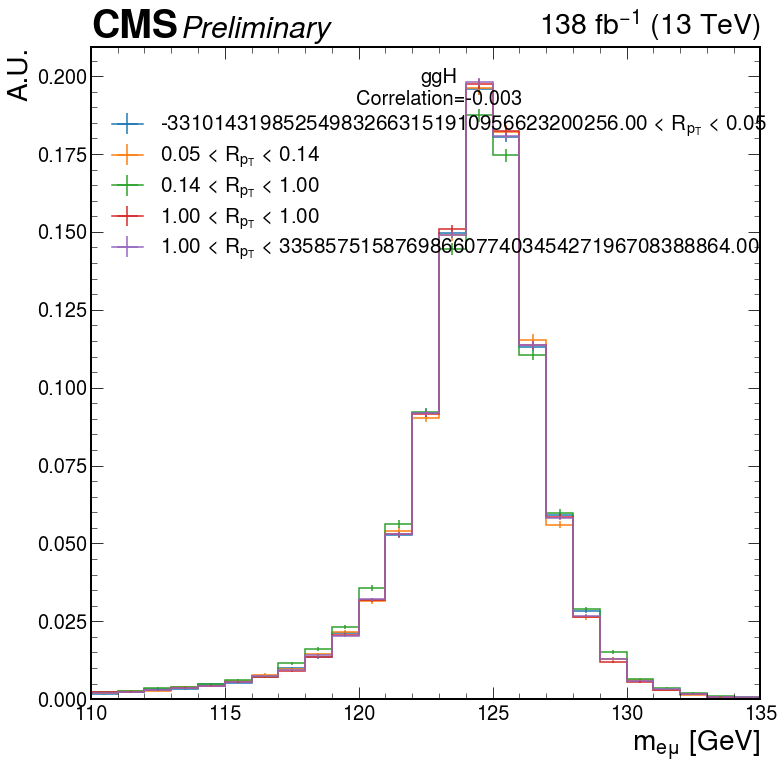

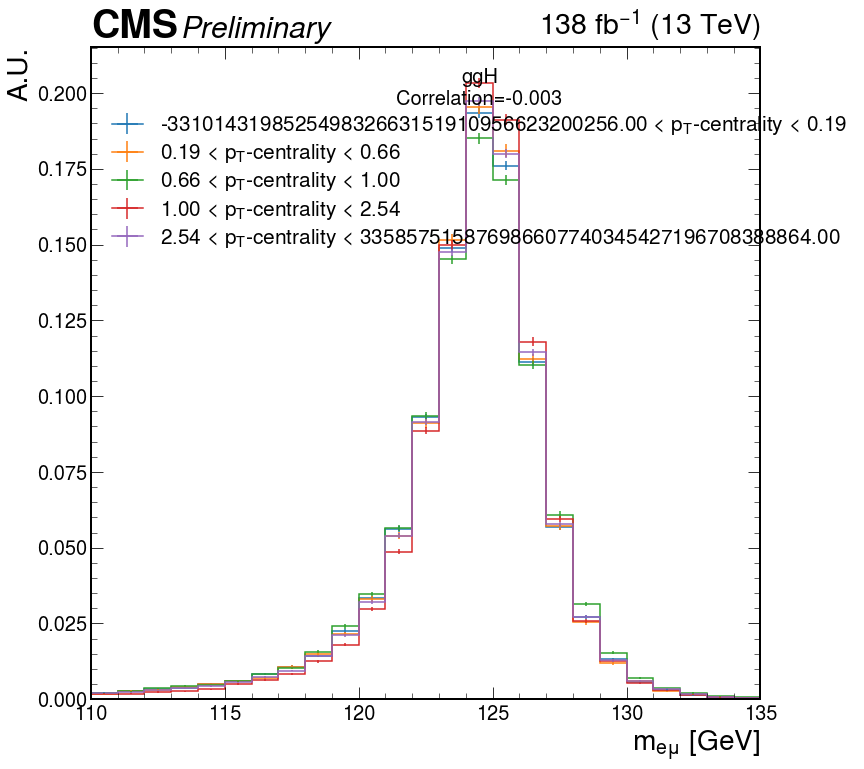

In [62]:
from coffea import hist
import mplhep
import matplotlib.pyplot as plt
%matplotlib inline

#Get 20% quantiles of the background
from statsmodels.stats.weightstats import DescrStatsW

for feature_name in feature_names:
    wq = DescrStatsW(data=data_bkg[feature_name], weights=data_bkg['weight'])
    h_quan = hist.Hist('A.U.', hist.Bin('e_m_Mass', '$m_{e\mu}$ [GeV]', 25, 110, 135), hist.Cat("sample", "sample"))
    quantiles = wq.quantile(probs=np.array([0, 0.20, 0.40, 0.60, 0.80, 1]), return_pandas=False)
    for i in range(len(quantiles)-1):
        #Fill in sliced invariant mass according to MVA quantiles
        quant25 = data_bkg[(data_bkg[feature_name]<quantiles[i+1])&(data_bkg[feature_name]>=quantiles[i])]
        label = f'{quantiles[i]:.2f} < {feature_names_tex_dict[feature_name]} < {quantiles[i+1]:.2f}'
        h_quan.fill(e_m_Mass=quant25['e_m_Mass'].to_numpy(), sample=label, weight=quant25['weight'].to_numpy())
        #scales[label] = 1/np.sum(quant25['weight'].to_numpy())

    #h_quan.scale(scales, axis='sample')

    plt.style.use(mplhep.style.CMS)
    plt.rcParams.update({
        'font.size': 30,
        'axes.titlesize': 24,
        'axes.labelsize': 28,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'legend.title_fontsize': 20
    })

    fig = plt.figure(
            figsize=(12,12),
          )

    ax = hist.plot1d(h_quan, density=True)
    #ax.set_ylim(0, 0.05)
    leg = ax.legend()
    handles, labels = ax.get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: float(t[0].split(' < ')[0])))
    leg = ax.legend(handles, labels, fontsize='x-small', loc='upper left', labelspacing=0.25, title=f"ggH\nCorrelation={corr(data_bkg[feature_name], data_bkg['e_m_Mass'], data_bkg['weight']):.3f}")
    plt.setp(leg.get_title(), multialignment='center')
#    plt.setp(leg.get_texts(), multialignment='center')
#     for t in leg.get_texts():
#         t.set_ha('right')

    lumi = mplhep.cms.label(ax=ax, lumi=138, label="Preliminary", data=1)
    #fig.savefig(f'plots/BDTValid/{catcatcat}_bkg.png')

/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:423: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:435: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) - rsumw
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:452: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom ** 2)
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:423: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:435: RuntimeWarning: inval

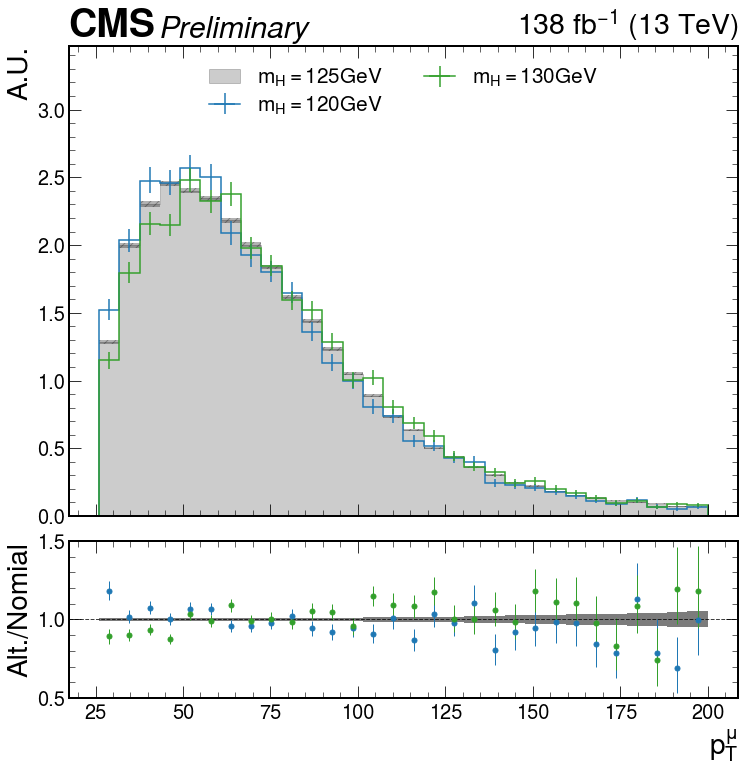

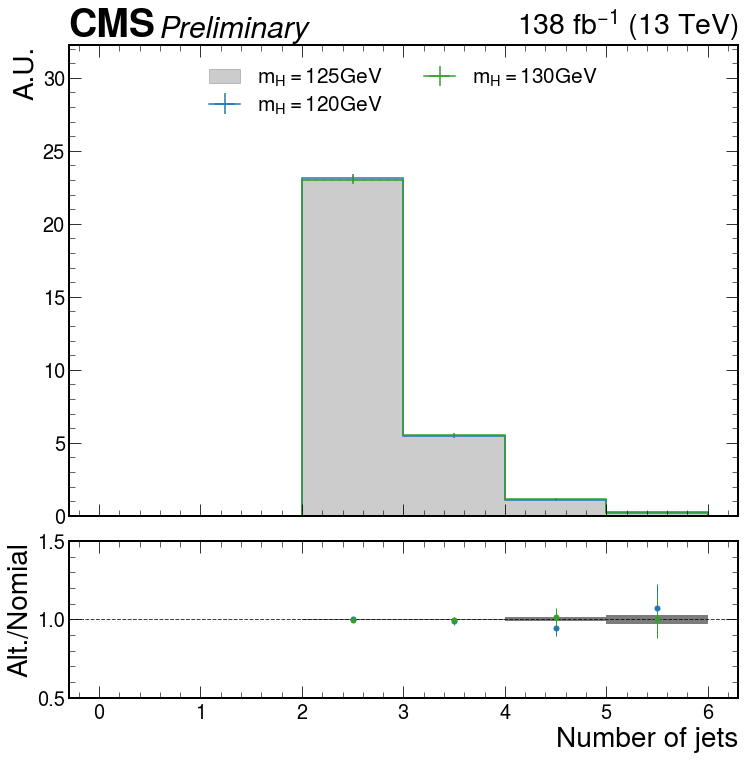

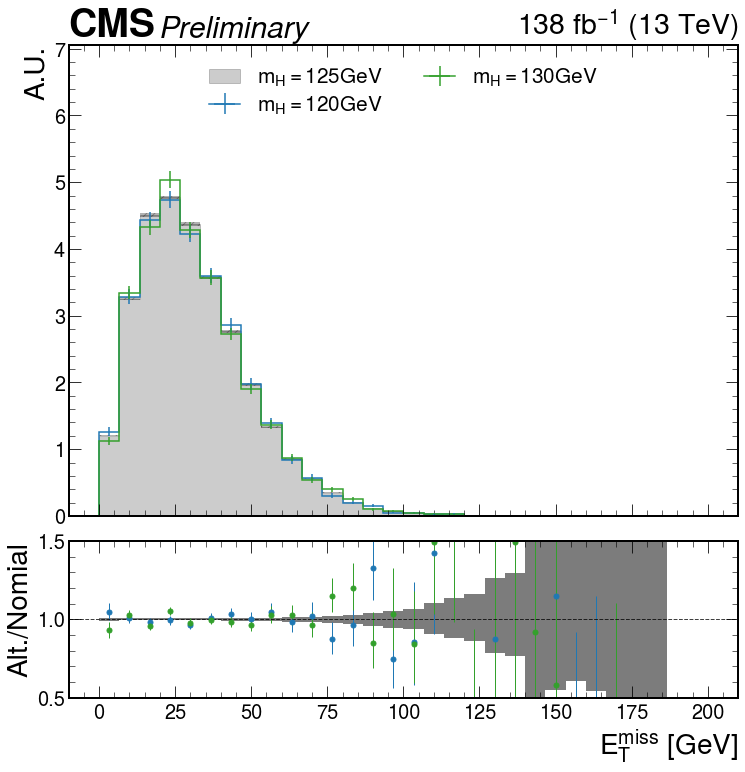

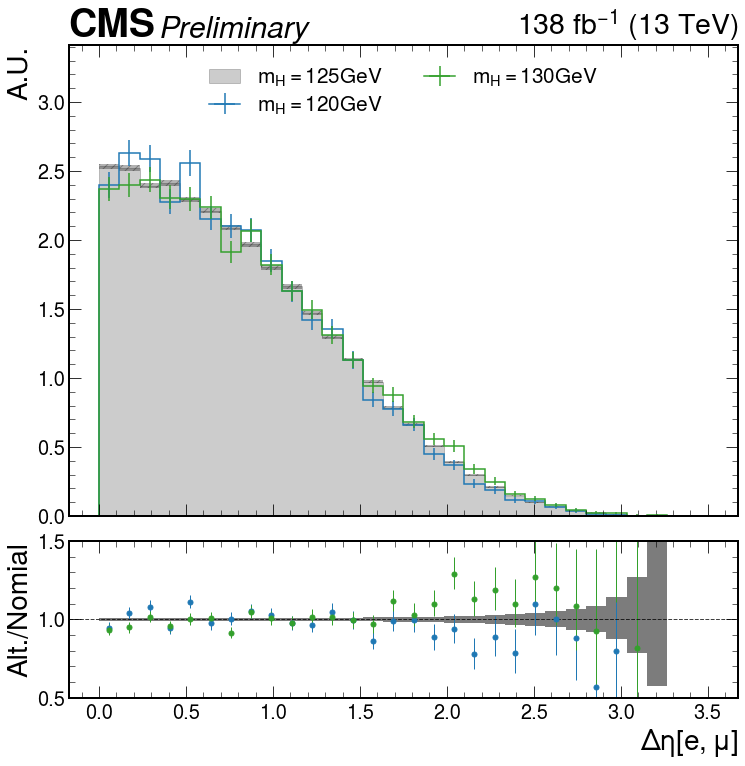

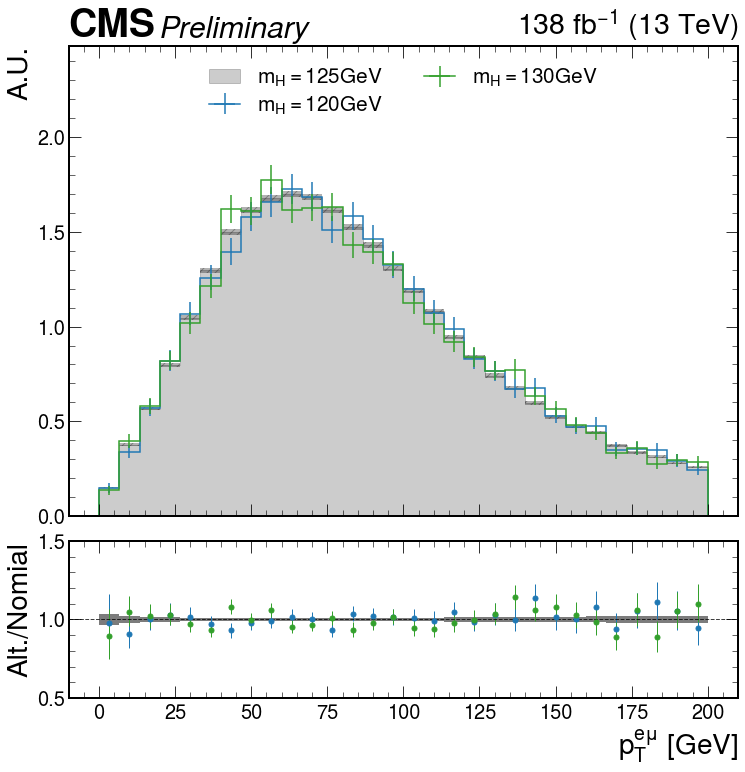

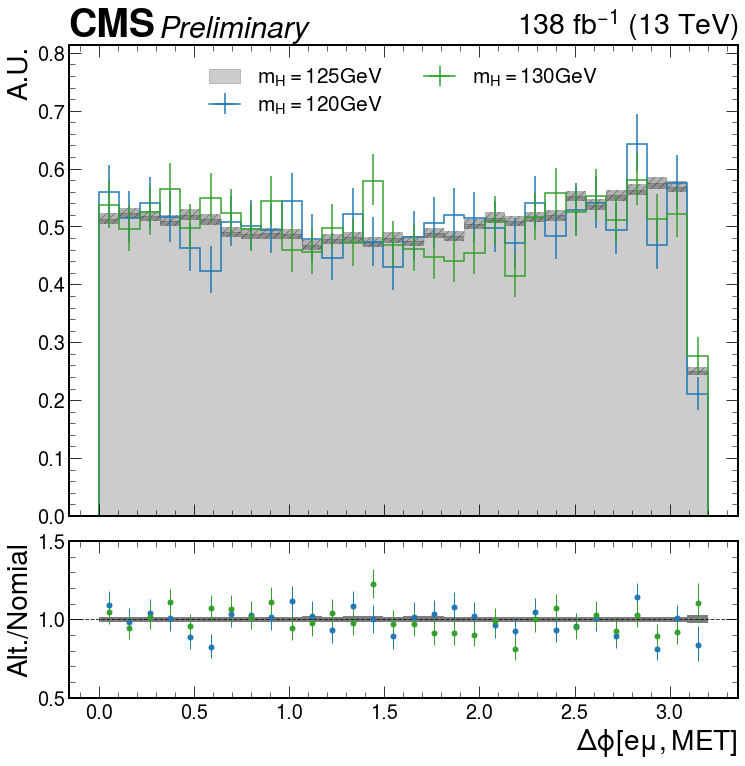

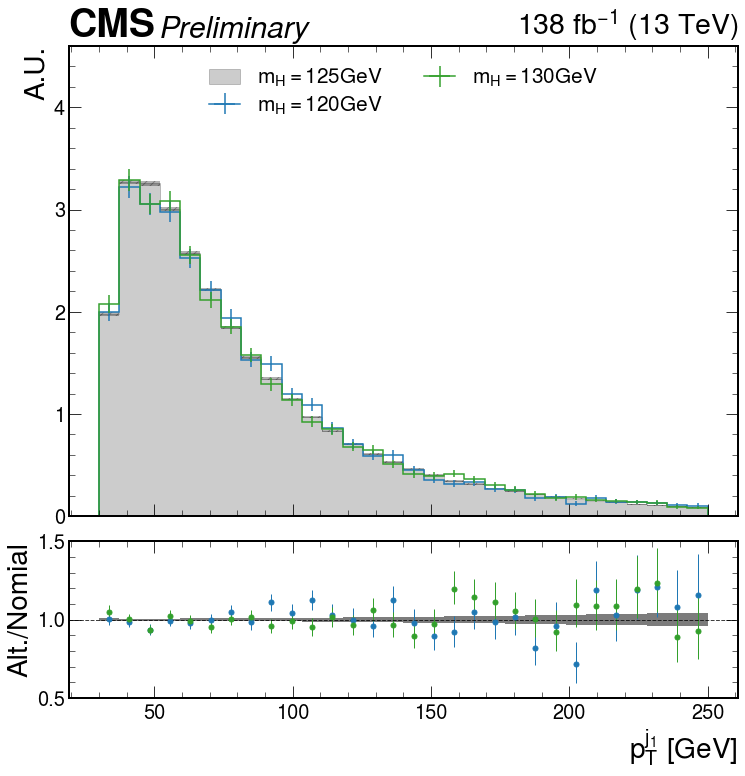

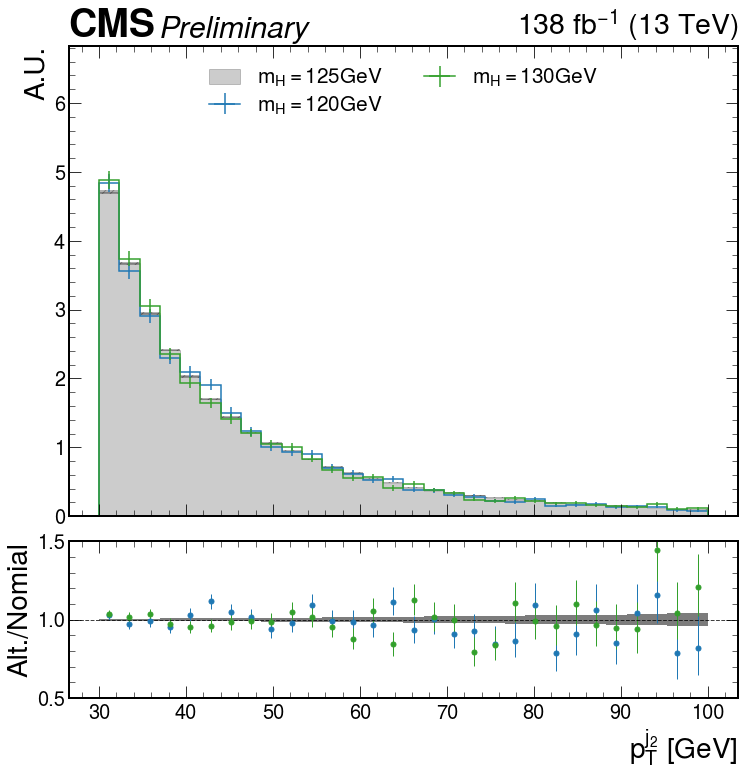

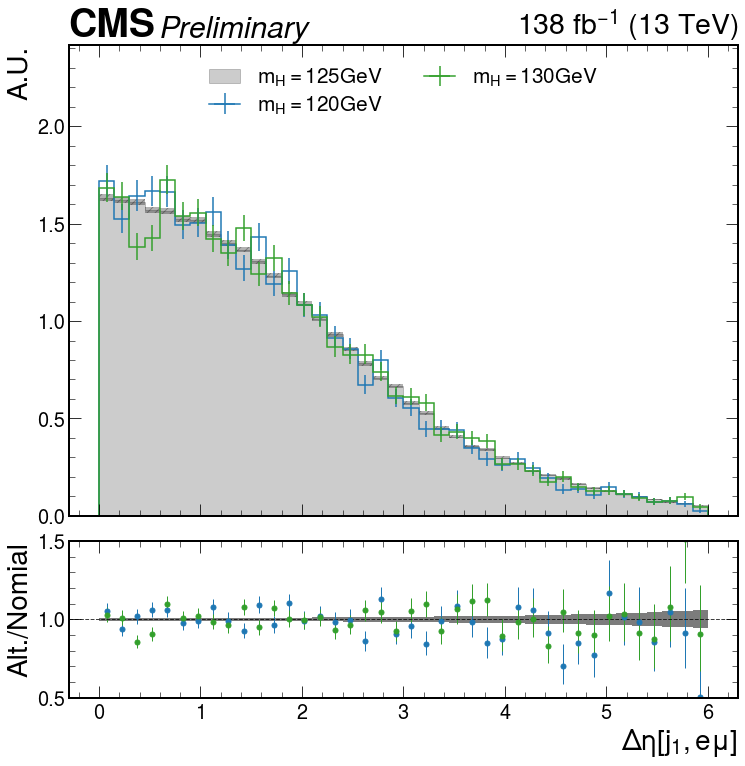

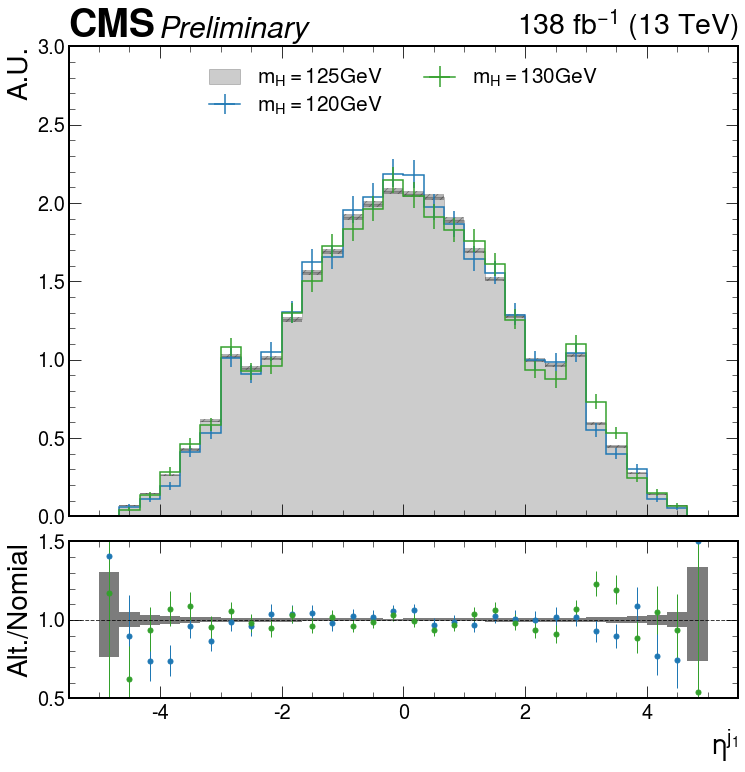

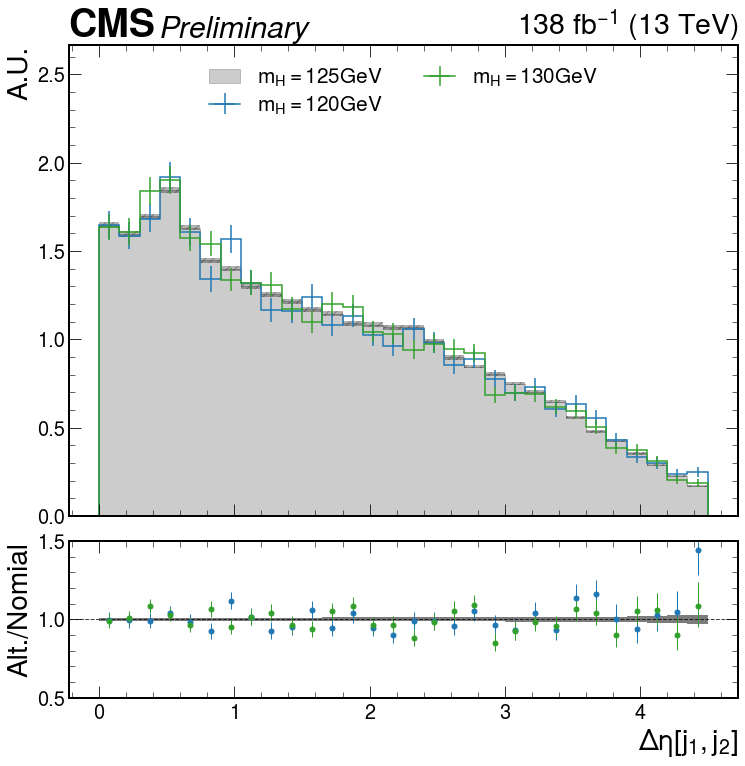

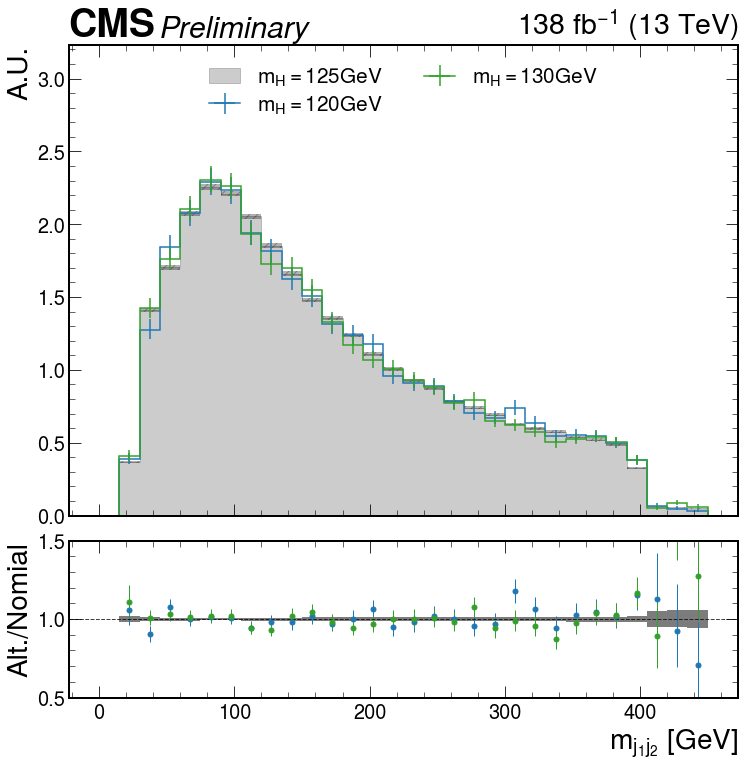

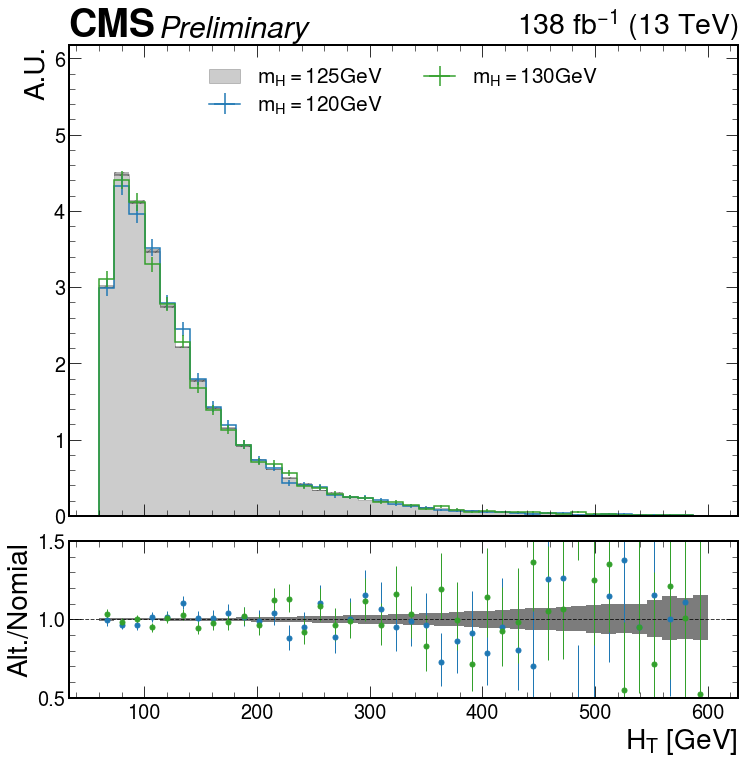

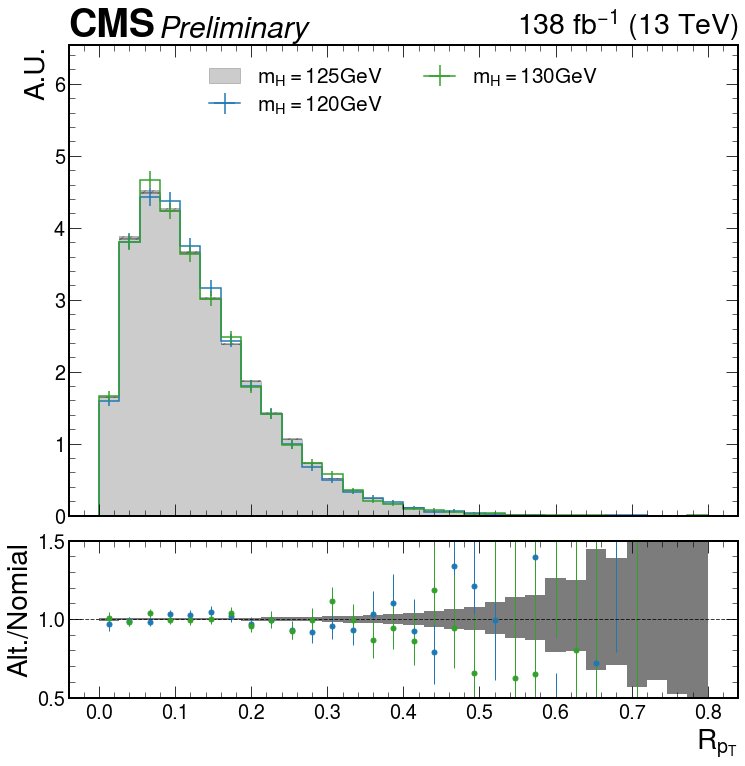

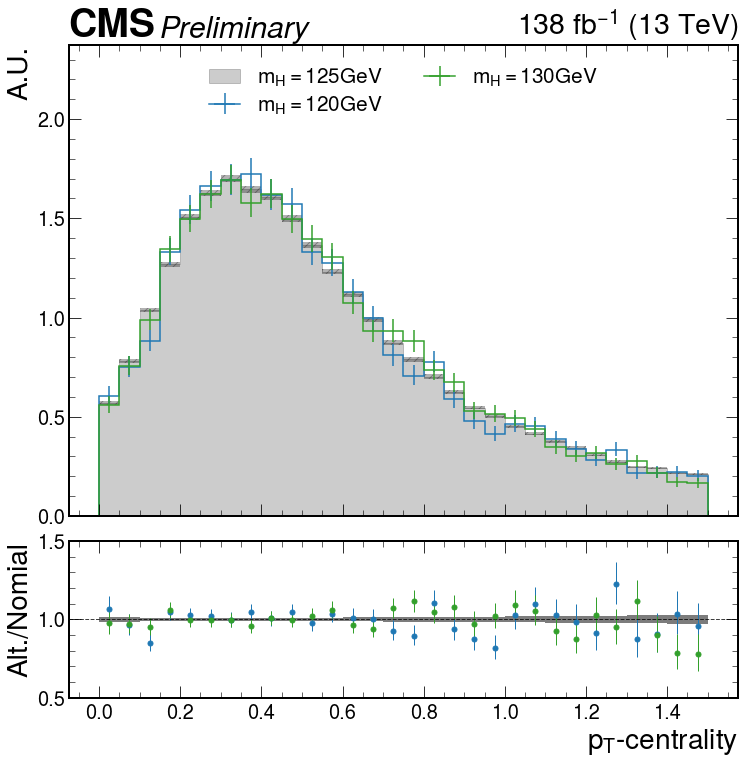

In [51]:
import mplhep
import matplotlib.pyplot as plt

%matplotlib inline
for feature_name in feature_names:
    h_mass = hist.Hist('A.U.', hist.Bin(feature_name, *features_map[feature_name]), hist.Cat("sample", "sample"))
    binning = 30
    args = {feature_name:data_bkg[feature_name].to_numpy(), 'weight':data_bkg['weight'].to_numpy(), 'sample':'$m_{H}=125$GeV' }
    args130 = {feature_name:data_bkg130[feature_name].to_numpy(), 'weight':data_bkg130['weight'].to_numpy(), 'sample':'$m_{H}=130$GeV'}
    args120 = {feature_name:data_bkg120[feature_name].to_numpy(), 'weight':data_bkg120['weight'].to_numpy(), 'sample':'$m_{H}=120$GeV'}
    h_mass.fill(**args)
    h_mass.fill(**args130)
    h_mass.fill(**args120)

    scales = {
                '$m_{H}=125$GeV': binning/np.sum(data_bkg['weight'].to_numpy()),
                '$m_{H}=120$GeV': binning/np.sum(data_bkg120['weight'].to_numpy()),
                '$m_{H}=130$GeV': binning/np.sum(data_bkg130['weight'].to_numpy()),
            }

    h_mass.scale(scales, axis='sample')

    plt.style.use(mplhep.style.CMS)
    plt.rcParams.update({
        'font.size': 30,
        'axes.titlesize': 24,
        'axes.labelsize': 28,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'legend.title_fontsize': 20
    })

    #For ratio plots
    fig, (ax, rax) = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=(12,12),
        gridspec_kw={"height_ratios": (3, 1)},
        sharex=True
    )

    fig.subplots_adjust(hspace=.08)

    error_opts = {
        'label': '',
        'hatch': '///',
        'facecolor': 'k',
        'alpha': 0.3,
        'edgecolor': (0,0,0,.5),
        'linewidth': 0
    }

    hist.plot1d(
        h_mass[:,'$m_{H}=125$GeV'],
        ax=ax,
        overlay='sample',
        stack=True,
        clear=False,
        fill_opts={'edgecolor': (0,0,0,0.3), 'alpha': 0.2, 'facecolor': 'k'},
        error_opts=error_opts,
    )

    from cycler import cycler
    colors = ['#1f78b4','#33a02c']
    ax.set_prop_cycle(cycler(color=colors))

    hist.plot1d(h_mass[:,['$m_{H}=120$GeV', '$m_{H}=130$GeV']], ax=ax, clear=False)
    ax.set_xlabel(None)

    leg = ax.legend(fontsize='x-small', labelspacing=0.25, ncol=2, loc=9, title='')

    data_err_opts = {
                'linestyle': 'none',
                'marker': '.',
                'markersize': 10.,
                'color': '#33a02c',
                'elinewidth': 1,
            }


    data_err_opts2 = {
                'linestyle': 'none',
                'marker': '.',
                'markersize': 10.,
                'color': '#1f78b4',
                'elinewidth': 1,
            }

    hist.plotratio(
        num=h_mass[:,'$m_{H}=120$GeV'].sum('sample'),
        denom=h_mass[:,'$m_{H}=125$GeV'].sum('sample'),
        ax=rax,
        error_opts=data_err_opts2,
        denom_fill_opts={},
        guide_opts={},
        unc='num',
        clear=False
    )

    hist.plotratio(
        num=h_mass[:,'$m_{H}=130$GeV'].sum('sample'),
        denom=h_mass[:,'$m_{H}=125$GeV'].sum('sample'),
        ax=rax,
        error_opts=data_err_opts,
        denom_fill_opts={},
        guide_opts={},
        unc='num',
        clear=False
    )

    #rax.set_xlim(0, 1)
    ax.set_ylim(0, max(h_mass[:,'$m_{H}=130$GeV'].values()[('$m_{H}=130$GeV',)])*1.4)
    rax.set_ylim(0.5, 1.5)
    rax.set_ylabel("Alt./Nomial", loc='center')

    lumi = mplhep.cms.label(ax=ax, lumi=138, label="Preliminary", data=1)
    #fig.savefig(f'plots/BDTValid/{catcatcat}_sig.png')
    # plt.text(0.5, 15, f'$\chi^{2}$ p-value for background (signal) = {p_bkg:.3f} ({p_sig:.3f})', 
    #          fontsize=20,
    #          horizontalalignment='center',
    #          verticalalignment='top')